This notebook presents summary and comparison of the results obtained by applying baseline model (03-baseline_model.ipynb), VGG16 (04-Fighting overfitting using data augmentation from keras.ipynb) and Gausian Noise in the classifier (05-models_using_gaussian_noise.ipynb).

In [1]:
import pandas as pd

# Baseline model

In [2]:
from keras.models import load_model

load_model("../models/baseline_model_omdena_v011119.h5").summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)      

In [3]:
df_baseline = pd.read_csv("../models/baseline_model_omdena_history_v011119.csv")

In [4]:
df_baseline['diff_loss'] = abs(df_baseline['loss']-df_baseline['val_loss'])
df_baseline['diff_acc'] = abs(df_baseline['acc']-df_baseline['val_acc'])
df_baseline = df_baseline[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [5]:
df_baseline.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
7,0.808500,0.583780,0.815041,0.416634,0.167146,0.006541
13,0.798500,0.526281,0.770161,1.293541,0.767260,0.028339
10,0.790000,0.567353,0.695122,0.333914,0.233440,0.094878
21,0.790000,0.518454,0.733740,0.014361,0.504093,0.056260
3,0.788500,0.573492,0.695122,0.191076,0.382416,0.093378
25,0.788491,0.518898,0.849798,0.206324,0.312574,0.061308
28,0.783000,0.533108,0.697154,0.314016,0.219093,0.085846
2,0.780000,0.550367,0.848790,0.172904,0.377463,0.068790
12,0.780000,0.539999,0.695122,0.412626,0.127373,0.084878
17,0.778500,0.544482,0.695122,0.210116,0.334367,0.083378


In [6]:
df_baseline.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
8,0.755679,0.566771,0.695122,0.483471,0.083300,0.060557
12,0.780000,0.539999,0.695122,0.412626,0.127373,0.084878
19,0.757193,0.553358,0.696138,0.416585,0.136773,0.061055
7,0.808500,0.583780,0.815041,0.416634,0.167146,0.006541
26,0.722000,0.583441,0.697154,0.394224,0.189216,0.024846
28,0.783000,0.533108,0.697154,0.314016,0.219093,0.085846
10,0.790000,0.567353,0.695122,0.333914,0.233440,0.094878
23,0.768500,0.548887,0.815041,0.311944,0.236943,0.046541
27,0.774500,0.523363,0.849798,0.282920,0.240443,0.075298
9,0.770000,0.560882,0.848790,0.271182,0.289700,0.078790


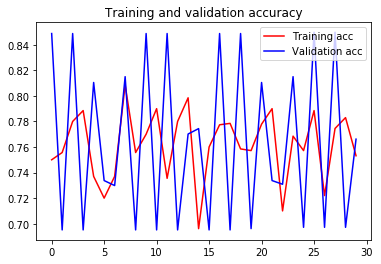

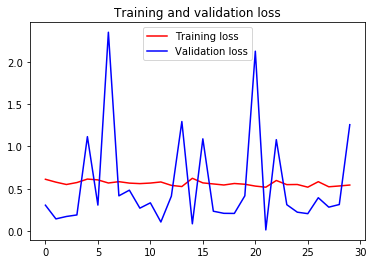

In [8]:
import matplotlib.pyplot as plt

acc = df_baseline['acc']
val_acc = df_baseline['val_acc']
loss = df_baseline['loss']
val_loss = df_baseline['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

Because the curves above are too noisy we apply the following function to have a smoother version of them.

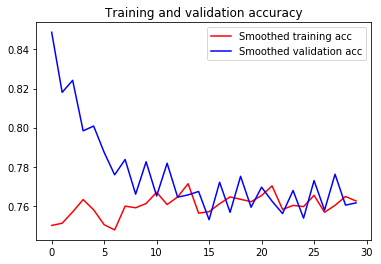

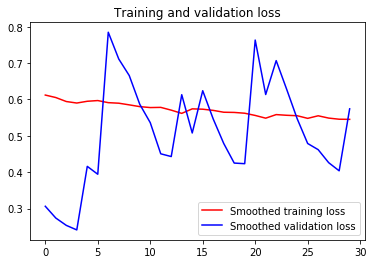

In [10]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 80.85%**

**validation: 81.50%**

However, the difference in loss indicates overfitting at this point (epoch 8).

The **lowest difference in loss** (training and validation) occurs in epoch 9 and the accuracy there is:

**training : 75.57%**

**validation: 69.51%**


# Pre-trained network available from keras (https://keras.io/applications/)

## VGG16

### Base - Feature extraction without data augmentation

In [11]:
df_vgg16 = pd.read_csv("../models/VGG_model_omdena_history_v051119.csv")
df_vgg16.head()

,acc,loss,val_acc,val_loss
0,0.747876,0.568802,0.781646,0.508381
1,0.776526,0.511126,0.787975,0.499676
2,0.789567,0.492521,0.787975,0.481350
3,0.793914,0.476111,0.802215,0.487124
4,0.795693,0.467054,0.799051,0.472159


In [12]:
df_vgg16['diff_loss'] = abs(df_vgg16['loss']-df_vgg16['val_loss'])
df_vgg16['diff_acc'] = abs(df_vgg16['acc']-df_vgg16['val_acc'])

df_vgg16 = df_vgg16[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [13]:
df_vgg16.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
28,0.843114,0.377074,0.816456,0.467547,0.090473,0.026658
27,0.842521,0.378517,0.813291,0.462914,0.084397,0.029230
29,0.842126,0.375318,0.811709,0.463551,0.088233,0.030417
26,0.841138,0.380766,0.816456,0.460296,0.079531,0.024682
23,0.836396,0.389378,0.810127,0.458564,0.069185,0.026269
25,0.836198,0.385695,0.814873,0.463959,0.078264,0.021325
24,0.836198,0.386551,0.811709,0.466575,0.080024,0.024490
21,0.835210,0.394234,0.813291,0.462195,0.067961,0.021919
22,0.831259,0.392807,0.811709,0.464733,0.071926,0.019550
20,0.829678,0.397554,0.810127,0.456680,0.059127,0.019551


In [14]:
df_vgg16.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
4,0.795693,0.467054,0.799051,0.472159,0.005105,0.003358
5,0.798854,0.462236,0.799051,0.469752,0.007516,0.000197
3,0.793914,0.476111,0.802215,0.487124,0.011014,0.008301
2,0.789567,0.492521,0.787975,0.481350,0.011170,0.001593
1,0.776526,0.511126,0.787975,0.499676,0.011450,0.011448
6,0.802411,0.451175,0.802215,0.465922,0.014747,0.000195
9,0.812290,0.435700,0.805380,0.463736,0.028036,0.006910
11,0.816044,0.428678,0.808544,0.458489,0.029810,0.007500
7,0.808338,0.440504,0.795886,0.471101,0.030597,0.012452
8,0.810709,0.441132,0.799051,0.472409,0.031277,0.011659


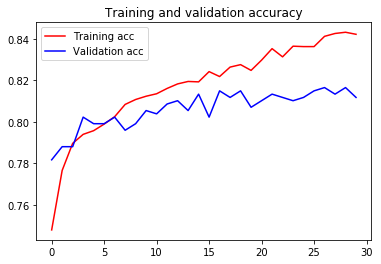

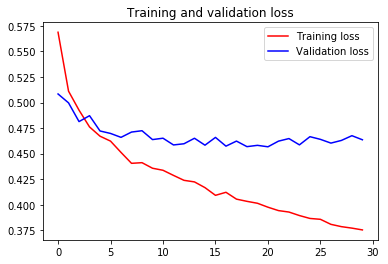

In [15]:
import matplotlib.pyplot as plt

acc = df_vgg16['acc']
val_acc = df_vgg16['val_acc']
loss = df_vgg16['loss']
val_loss = df_vgg16['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 84.31%**

**validation: 81.64%**

However, the difference in loss indicates overfitting at this point (epoch 29).

The **lowest difference in loss** (training and validation) occurs in epoch 5 and the accuracy there is:

**training : 79.57%**

**validation: 79.91%**


### VGG16 with data augmentation

In [16]:
df_vgg16_da = pd.read_csv("../models/VGG_model_omdena_history_data_augmentation_v051119.csv")
df_vgg16_da.head()

,acc,loss,val_acc,val_loss
0,0.758000,0.538538,0.761089,0.531609
1,0.773347,0.506571,0.775202,0.532534
2,0.768000,0.523513,0.793347,0.491631
3,0.785500,0.501313,0.781250,0.526724
4,0.785967,0.491938,0.783266,0.544230


In [17]:
df_vgg16_da['diff_loss'] = abs(df_vgg16_da['loss']-df_vgg16_da['val_loss'])
df_vgg16_da['diff_acc'] = abs(df_vgg16_da['acc']-df_vgg16_da['val_acc'])

df_vgg16_da = df_vgg16_da[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [18]:
df_vgg16_da.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
24,0.813500,0.446449,0.791331,0.523835,0.077386,0.022169
19,0.806000,0.448555,0.798387,0.501718,0.053163,0.007613
10,0.802120,0.475080,0.776210,0.511517,0.036438,0.025910
17,0.801111,0.460873,0.804435,0.477410,0.016537,0.003325
27,0.801000,0.463808,0.791331,0.507250,0.043442,0.009669
14,0.800500,0.481715,0.786290,0.498325,0.016610,0.014210
26,0.798082,0.468143,0.818548,0.453310,0.014833,0.020467
28,0.797577,0.461506,0.791331,0.511662,0.050157,0.006246
29,0.797000,0.471457,0.801411,0.504094,0.032638,0.004411
13,0.796567,0.483620,0.800403,0.473048,0.010572,0.003836


In [19]:
df_vgg16_da.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
9,0.791519,0.481875,0.795363,0.482861,0.000986,0.003843
7,0.779000,0.503739,0.790323,0.499532,0.004207,0.011323
0,0.758000,0.538538,0.761089,0.531609,0.006929,0.003089
23,0.787481,0.475131,0.794355,0.482494,0.007363,0.006874
8,0.782500,0.498519,0.790323,0.488669,0.009850,0.007823
21,0.791000,0.478584,0.791331,0.488737,0.010152,0.000331
13,0.796567,0.483620,0.800403,0.473048,0.010572,0.003836
11,0.787000,0.489694,0.799395,0.478939,0.010754,0.012395
16,0.787000,0.476236,0.796371,0.489937,0.013701,0.009371
20,0.791519,0.470731,0.796371,0.484464,0.013733,0.004852


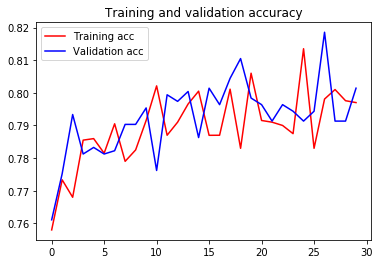

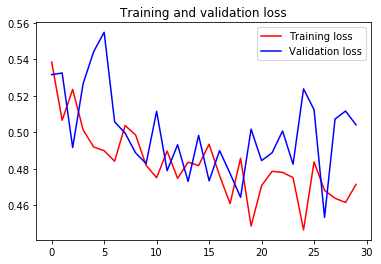

In [20]:
import matplotlib.pyplot as plt

acc = df_vgg16_da['acc']
val_acc = df_vgg16_da['val_acc']
loss = df_vgg16_da['loss']
val_loss = df_vgg16_da['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Because the curves above are too noisy we apply the following function to have a smoother version of them.

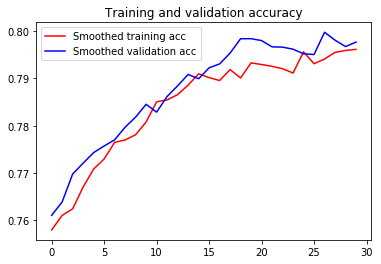

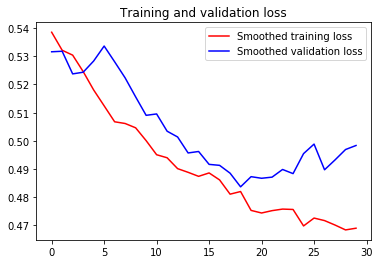

In [21]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 81.35%**

**validation: 79.13%**

However, the difference in loss indicates overfitting at this point (epoch 25).

The **lowest difference in loss** (training and validation) occurs in epoch 10 and the accuracy there is:

**training : 79.15%**

**validation: 79.54%**


### VGG16 with data augmentation and class_weigth = 'auto'

In [22]:
df_vgg16_daw = pd.read_csv("../models/VGG_model_omdena_history_data_augmentation_weight_auto_v051119.csv")
df_vgg16_daw.head()

,acc,loss,val_acc,val_loss
0,0.790510,0.481865,0.802419,0.466160
1,0.796500,0.459376,0.806452,0.467231
2,0.792529,0.472144,0.813508,0.460334
3,0.814500,0.447182,0.798387,0.458990
4,0.796000,0.464272,0.802419,0.474168


In [23]:
df_vgg16_daw['diff_loss'] = abs(df_vgg16_daw['loss']-df_vgg16_daw['val_loss'])
df_vgg16_daw['diff_acc'] = abs(df_vgg16_daw['acc']-df_vgg16_daw['val_acc'])

df_vgg16_daw = df_vgg16_daw[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [24]:
df_vgg16_daw.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
17,0.815500,0.446267,0.796371,0.494441,0.048174,0.019129
3,0.814500,0.447182,0.798387,0.458990,0.011808,0.016113
27,0.814500,0.433897,0.807460,0.465677,0.031780,0.007040
29,0.812721,0.436174,0.798387,0.476073,0.039899,0.014334
21,0.811500,0.449948,0.801411,0.464111,0.014163,0.010089
7,0.809187,0.460644,0.805444,0.451458,0.009186,0.003744
19,0.809000,0.454799,0.812500,0.460157,0.005358,0.003500
14,0.808682,0.443977,0.793347,0.505935,0.061958,0.015336
11,0.805500,0.458955,0.802419,0.474511,0.015556,0.003081
16,0.803130,0.461182,0.797379,0.479403,0.018221,0.005751


In [25]:
df_vgg16_daw.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
5,0.796063,0.461108,0.810484,0.460350,0.000758,0.014421
28,0.802500,0.456206,0.806452,0.457127,0.000921,0.003952
15,0.798000,0.460429,0.803427,0.458909,0.001520,0.005427
9,0.793000,0.468536,0.795363,0.465872,0.002664,0.002363
18,0.793539,0.466809,0.809476,0.462683,0.004126,0.015937
22,0.800000,0.465968,0.812500,0.461370,0.004598,0.012500
19,0.809000,0.454799,0.812500,0.460157,0.005358,0.003500
1,0.796500,0.459376,0.806452,0.467231,0.007855,0.009952
7,0.809187,0.460644,0.805444,0.451458,0.009186,0.003744
4,0.796000,0.464272,0.802419,0.474168,0.009895,0.006419


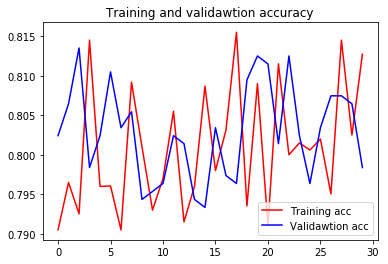

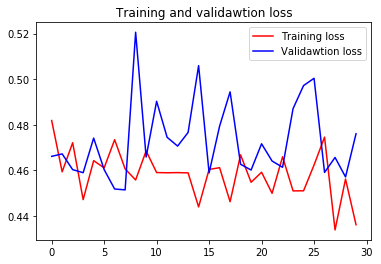

In [26]:
import matplotlib.pyplot as plt

acc = df_vgg16_daw['acc']
val_acc = df_vgg16_daw['val_acc']
loss = df_vgg16_daw['loss']
val_loss = df_vgg16_daw['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validawtion acc')
plt.title('Training and validawtion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validawtion loss')
plt.title('Training and validawtion loss')
plt.legend()

plt.show()

Because the curves above are too noisy we apply the following function to have a smoother version of them.

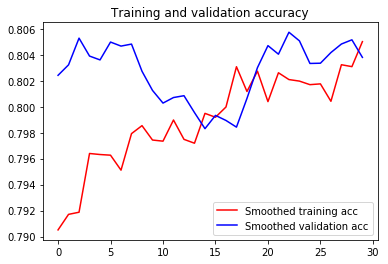

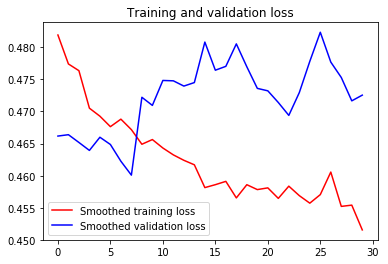

In [27]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 81.55%**

**validation: 79.64%**

However, the difference in loss indicates overfitting at this point (epoch 18).

The **lowest difference in loss** (training and validation) occurs in epoch 6 and the accuracy there is:

**training : 79.61%**

**validation: 81.05%**


### VGG16 with data augmentation and class_weigth = 'auto' fine tunned

In [28]:
df_vgg16_daw_ft = pd.read_csv("../models/VGG_model_omdena_history_data_augmentation_weight_auto_fine_tunned_v051119.csv")
df_vgg16_daw_ft.head()

,acc,loss,val_acc,val_loss
0,0.792000,0.462708,0.803427,0.495595
1,0.802500,0.462372,0.796371,0.467118
2,0.807673,0.452909,0.795363,0.456103
3,0.797000,0.452590,0.803427,0.468155
4,0.805500,0.451650,0.801411,0.476587


In [29]:
df_vgg16_daw_ft['diff_loss'] = abs(df_vgg16_daw_ft['loss']-df_vgg16_daw_ft['val_loss'])
df_vgg16_daw_ft['diff_acc'] = abs(df_vgg16_daw_ft['acc']-df_vgg16_daw_ft['val_acc'])

df_vgg16_daw_ft = df_vgg16_daw_ft[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [30]:
df_vgg16_daw_ft.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
92,0.868000,0.337364,0.810484,0.641841,0.304477,0.057516
99,0.867500,0.321456,0.805444,0.740946,0.419490,0.062056
66,0.865220,0.342242,0.802419,0.720291,0.378049,0.062800
82,0.864000,0.340526,0.792339,0.633959,0.293433,0.071661
98,0.863705,0.326950,0.813508,0.800990,0.474040,0.050197
90,0.862000,0.339977,0.805444,0.582869,0.242892,0.056556
96,0.861500,0.328727,0.800403,0.625972,0.297245,0.061097
84,0.861181,0.342575,0.803427,0.504285,0.161710,0.057754
87,0.860676,0.343396,0.801411,0.560612,0.217215,0.059265
88,0.860500,0.334420,0.818548,0.589116,0.254696,0.041952


In [31]:
df_vgg16_daw_ft.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
5,0.799694,0.450255,0.803427,0.448255,0.002001,0.003733
2,0.807673,0.452909,0.795363,0.456103,0.003194,0.012310
1,0.802500,0.462372,0.796371,0.467118,0.004746,0.006129
3,0.797000,0.452590,0.803427,0.468155,0.015565,0.006427
7,0.807500,0.441305,0.805444,0.465705,0.024400,0.002056
4,0.805500,0.451650,0.801411,0.476587,0.024937,0.004089
6,0.821500,0.428533,0.789315,0.459960,0.031427,0.032185
0,0.792000,0.462708,0.803427,0.495595,0.032887,0.011427
19,0.818500,0.430506,0.798387,0.466657,0.036151,0.020113
10,0.819788,0.425479,0.809476,0.477075,0.051596,0.010312


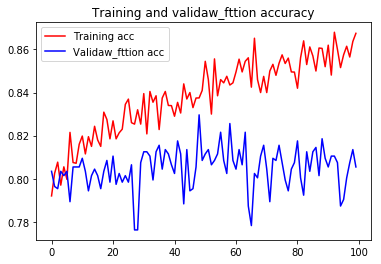

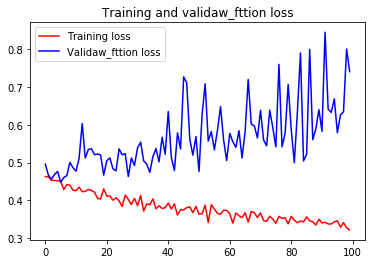

In [32]:
import matplotlib.pyplot as plt

acc = df_vgg16_daw_ft['acc']
val_acc = df_vgg16_daw_ft['val_acc']
loss = df_vgg16_daw_ft['loss']
val_loss = df_vgg16_daw_ft['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validaw_fttion acc')
plt.title('Training and validaw_fttion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validaw_fttion loss')
plt.title('Training and validaw_fttion loss')
plt.legend()

plt.show()

Because the curves above are too noisy we apply the following function to have a smoother version of them.

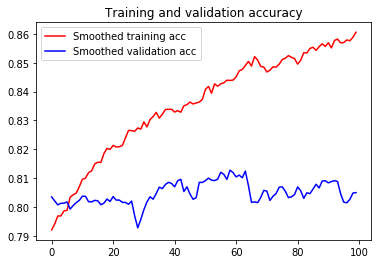

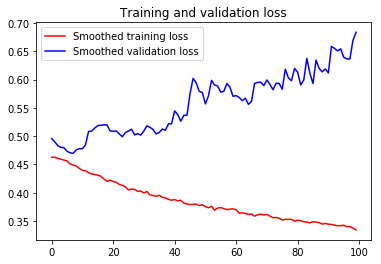

In [33]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 86.80%**

**validation: 81.05%**

However, the difference in loss indicates overfitting at this point (epoch 93).

The **lowest difference in loss** (training and validation) occurs in epoch 6 and the accuracy there is:

**training : 79.97%**

**validation: 80.35%**


In [34]:
df = pd.DataFrame(data = {'models':['baseline','vgg16_baseline','vgg16_d_aug','vgg16_d_aug_w_auto','vgg16_d_aug_w_auto_ft'], 
                          'max_acc':[80.85,84.31, 81.35, 81.55,86.8], 'val_acc':[81.50,81.64,79.13, 79.64, 81.05], 
                          'acc_min_diff_loss':[75.57,79.57, 79.15, 79.61,79.97], 'val_acc_min_diff_loss':[69.51,79.91, 79.54, 81.05, 80.35],
                          'diff_loss':[0.061,0.005,0.004,0.001,0.002]})
df

,models,max_acc,val_acc,acc_min_diff_loss,val_acc_min_diff_loss,diff_loss
0,baseline,80.85,81.50,75.57,69.51,0.061
1,vgg16_baseline,84.31,81.64,79.57,79.91,0.005
2,vgg16_d_aug,81.35,79.13,79.15,79.54,0.004
3,vgg16_d_aug_w_auto,81.55,79.64,79.61,81.05,0.001
4,vgg16_d_aug_w_auto_ft,86.80,81.05,79.97,80.35,0.002


In [35]:
df.columns

Index(['models', 'max_acc', 'val_acc', 'acc_min_diff_loss',
       'val_acc_min_diff_loss', 'diff_loss'],
      dtype='object')

In [36]:
df.sort_values(['max_acc'], ascending=False)

,models,max_acc,val_acc,acc_min_diff_loss,val_acc_min_diff_loss,diff_loss
4,vgg16_d_aug_w_auto_ft,86.80,81.05,79.97,80.35,0.002
1,vgg16_baseline,84.31,81.64,79.57,79.91,0.005
3,vgg16_d_aug_w_auto,81.55,79.64,79.61,81.05,0.001
2,vgg16_d_aug,81.35,79.13,79.15,79.54,0.004
0,baseline,80.85,81.50,75.57,69.51,0.061


In [37]:
df.sort_values(['val_acc_min_diff_loss'], ascending=False)

,models,max_acc,val_acc,acc_min_diff_loss,val_acc_min_diff_loss,diff_loss
3,vgg16_d_aug_w_auto,81.55,79.64,79.61,81.05,0.001
4,vgg16_d_aug_w_auto_ft,86.80,81.05,79.97,80.35,0.002
1,vgg16_baseline,84.31,81.64,79.57,79.91,0.005
2,vgg16_d_aug,81.35,79.13,79.15,79.54,0.004
0,baseline,80.85,81.50,75.57,69.51,0.061


### VGG16 with data augmentation and a Gaussian noise layer

In [38]:
df_vgg16_da_gn = pd.read_csv("../models/VGG_model_omdena_history_gaussian_noise_v111119.csv")
df_vgg16_da_gn.head()

,val_loss,val_acc,loss,acc
0,0.435531,0.761089,0.540651,0.765500
1,0.627670,0.779472,0.532954,0.760727
2,0.871271,0.781250,0.502805,0.780000
3,0.678116,0.789634,0.518896,0.769000


In [39]:
df_vgg16_da_gn['diff_loss'] = abs(df_vgg16_da_gn['loss']-df_vgg16_da_gn['val_loss'])
df_vgg16_da_gn['diff_acc'] = abs(df_vgg16_da_gn['acc']-df_vgg16_da_gn['val_acc'])

df_vgg16_da_gn = df_vgg16_da_gn[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [40]:
df_vgg16_da_gn.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
2,0.780000,0.502805,0.781250,0.871271,0.368466,0.001250
3,0.769000,0.518896,0.789634,0.678116,0.159220,0.020634
0,0.765500,0.540651,0.761089,0.435531,0.105119,0.004411
1,0.760727,0.532954,0.779472,0.627670,0.094716,0.018745


In [41]:
df_vgg16_da_gn.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
1,0.760727,0.532954,0.779472,0.627670,0.094716,0.018745
0,0.765500,0.540651,0.761089,0.435531,0.105119,0.004411
3,0.769000,0.518896,0.789634,0.678116,0.159220,0.020634
2,0.780000,0.502805,0.781250,0.871271,0.368466,0.001250


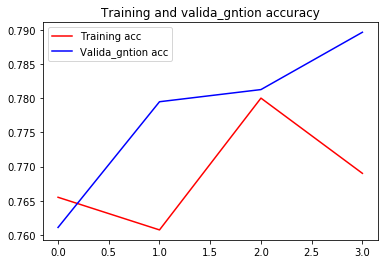

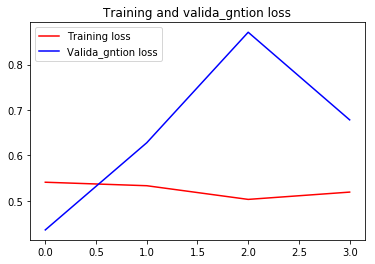

In [42]:
import matplotlib.pyplot as plt

acc = df_vgg16_da_gn['acc']
val_acc = df_vgg16_da_gn['val_acc']
loss = df_vgg16_da_gn['loss']
val_loss = df_vgg16_da_gn['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Valida_gntion acc')
plt.title('Training and valida_gntion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Valida_gntion loss')
plt.title('Training and valida_gntion loss')
plt.legend()

plt.show()

Because the curves above are too noisy we apply the following function to have a smoother version of them.

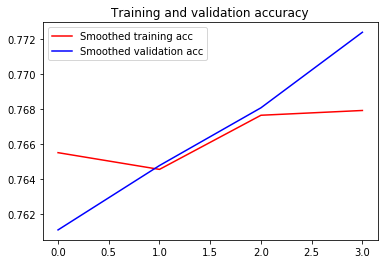

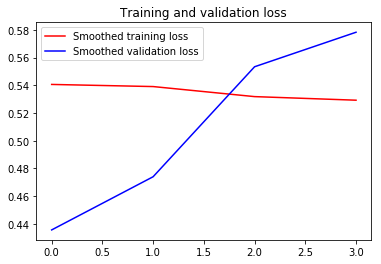

In [43]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 78.00%**

**validation: 78.13%**

However, the difference in loss indicates overfitting at this point (epoch 3).

The **lowest difference in loss** (training and validation) occurs in epoch 2 and the accuracy there is:

**training : 76.07%**

**validation: 77.95%**


### VGG16 with data augmentation and class_weigth = 'auto' and a Gaussian noise layer

In [44]:
df_vgg16_daw_gn = pd.read_csv("../models/VGG_model_omdena_history_data_augmentation_weight_auto_gaussian_noise_v111119.csv")
df_vgg16_daw_gn.head()

,val_loss,val_acc,loss,acc
0,0.327612,0.797379,0.495533,0.791519
1,0.388391,0.781504,0.513441,0.775000
2,0.342832,0.776210,0.484490,0.795558
3,0.765415,0.793699,0.516012,0.767500


In [45]:
df_vgg16_daw_gn['diff_loss'] = abs(df_vgg16_daw_gn['loss']-df_vgg16_daw_gn['val_loss'])
df_vgg16_daw_gn['diff_acc'] = abs(df_vgg16_daw_gn['acc']-df_vgg16_daw_gn['val_acc'])

df_vgg16_daw_gn = df_vgg16_daw_gn[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [46]:
df_vgg16_daw_gn.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
2,0.795558,0.484490,0.776210,0.342832,0.141658,0.019348
0,0.791519,0.495533,0.797379,0.327612,0.167921,0.005860
1,0.775000,0.513441,0.781504,0.388391,0.125050,0.006504
3,0.767500,0.516012,0.793699,0.765415,0.249403,0.026199


In [47]:
df_vgg16_daw_gn.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
1,0.775000,0.513441,0.781504,0.388391,0.125050,0.006504
2,0.795558,0.484490,0.776210,0.342832,0.141658,0.019348
0,0.791519,0.495533,0.797379,0.327612,0.167921,0.005860
3,0.767500,0.516012,0.793699,0.765415,0.249403,0.026199


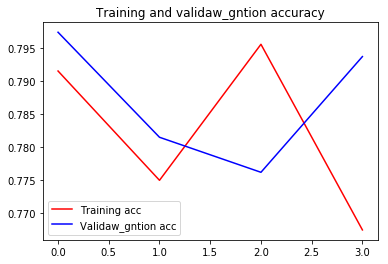

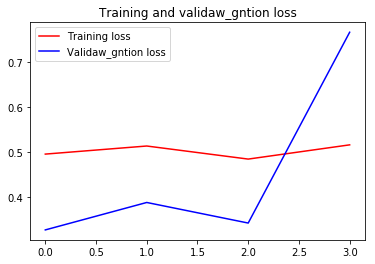

In [48]:
import matplotlib.pyplot as plt

acc = df_vgg16_daw_gn['acc']
val_acc = df_vgg16_daw_gn['val_acc']
loss = df_vgg16_daw_gn['loss']
val_loss = df_vgg16_daw_gn['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaw_gntion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaw_gntion loss')
plt.legend()

plt.show()

Because the curves above are too noisy we apply the following function to have a smoother version of them.

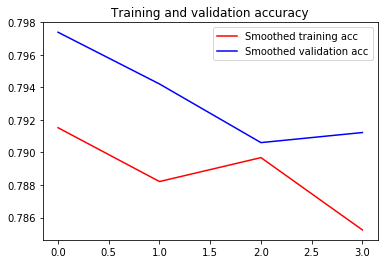

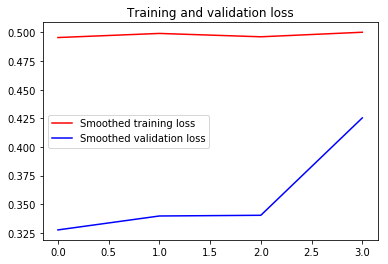

In [49]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 79.55%**

**validation: 77.62%**

However, the difference in loss indicates overfitting at this point (epoch 3).

The **lowest difference in loss** (training and validation) occurs in epoch 2 and the accuracy there is:

**training : 77.50%**

**validation: 78.15%**


### VGG16 with data augmentation and class_weigth = 'auto' fine tunned and a Guassian noise layer

In [50]:
df_vgg16_daw_ft_gn = pd.read_csv("../models/VGG_model_omdena_history_data_augmentation_weight_auto_fine_tunned_gaussian_noise_v111119.csv")
df_vgg16_daw_ft_gn.head()

,val_loss,val_acc,loss,acc
0,0.256929,0.793347,0.489968,0.7970
1,0.617583,0.796748,0.486299,0.7895
2,0.681453,0.781250,0.476376,0.7950
3,0.387750,0.796748,0.474570,0.7875


In [51]:
df_vgg16_daw_ft_gn['diff_loss'] = abs(df_vgg16_daw_ft_gn['loss']-df_vgg16_daw_ft_gn['val_loss'])
df_vgg16_daw_ft_gn['diff_acc'] = abs(df_vgg16_daw_ft_gn['acc']-df_vgg16_daw_ft_gn['val_acc'])

df_vgg16_daw_ft_gn = df_vgg16_daw_ft_gn[['acc', 'loss', 'val_acc', 'val_loss', 'diff_loss', 'diff_acc']]

In [52]:
df_vgg16_daw_ft_gn.sort_values('acc', ascending=False).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
0,0.7970,0.489968,0.793347,0.256929,0.233039,0.003653
2,0.7950,0.476376,0.781250,0.681453,0.205076,0.013750
1,0.7895,0.486299,0.796748,0.617583,0.131284,0.007248
3,0.7875,0.474570,0.796748,0.387750,0.086820,0.009248


In [53]:
df_vgg16_daw_ft_gn.sort_values(['diff_loss','diff_acc']).head(10)

,acc,loss,val_acc,val_loss,diff_loss,diff_acc
3,0.7875,0.474570,0.796748,0.387750,0.086820,0.009248
1,0.7895,0.486299,0.796748,0.617583,0.131284,0.007248
2,0.7950,0.476376,0.781250,0.681453,0.205076,0.013750
0,0.7970,0.489968,0.793347,0.256929,0.233039,0.003653


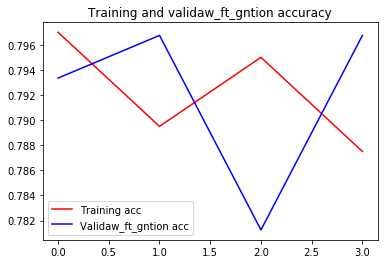

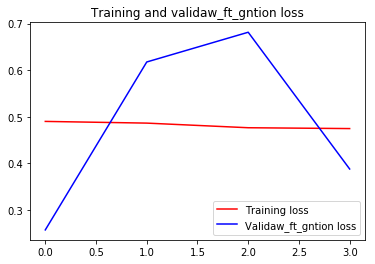

In [54]:
import matplotlib.pyplot as plt

acc = df_vgg16_daw_ft_gn['acc']
val_acc = df_vgg16_daw_ft_gn['val_acc']
loss = df_vgg16_daw_ft_gn['loss']
val_loss = df_vgg16_daw_ft_gn['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validaw_ft_gntion accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validaw_ft_gntion loss')
plt.legend()

plt.show()

Because the curves above are too noisy we apply the following function to have a smoother version of them.

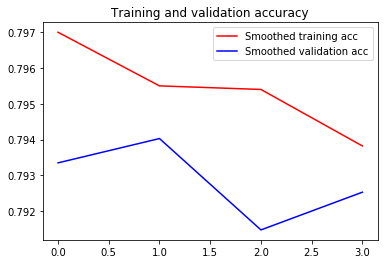

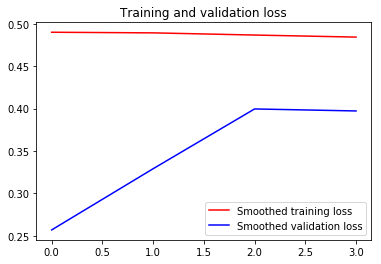

In [55]:
plt.plot(epochs,
         smooth_curve(acc), 'r', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'r', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The **highest accuracy** is:

**training : 79.70%**

**validation: 79.33%**

However, the difference in loss indicates overfitting at this point (epoch 1).

The **lowest difference in loss** (training and validation) occurs in epoch 4 and the accuracy there is:

**training : 78.75%**

**validation: 79.67%**


In [56]:
df = pd.DataFrame(data = {'models':['baseline','vgg16_baseline','vgg16_d_aug','vgg16_d_aug_w_auto',
                                    'vgg16_d_aug_w_auto_ft','vgg16_d_aug_gauss','vgg16_d_aug_w_auto_gauss',
                                   'vgg16_d_aug_w_auto_ft'], 
                          'max_acc':[80.85,84.31, 81.35, 81.55,86.8, 78.00, 79.55, 79.70], 
                          'val_acc':[81.50,81.64,79.13, 79.64, 81.05, 78.13, 77.62, 79.33], 
                          'acc_min_diff_loss':[75.57,79.57, 79.15, 79.61,79.97, 76.07,77.50, 78.75], 
                          'val_acc_min_diff_loss':[69.51,79.91, 79.54, 81.05, 80.35, 77.95, 78.15, 79.67],
                          'diff_loss':[0.061,0.005,0.004,0.001,0.002, 0.095, 0.007,0.087]})
df

,models,max_acc,val_acc,acc_min_diff_loss,val_acc_min_diff_loss,diff_loss
0,baseline,80.85,81.50,75.57,69.51,0.061
1,vgg16_baseline,84.31,81.64,79.57,79.91,0.005
2,vgg16_d_aug,81.35,79.13,79.15,79.54,0.004
3,vgg16_d_aug_w_auto,81.55,79.64,79.61,81.05,0.001
4,vgg16_d_aug_w_auto_ft,86.80,81.05,79.97,80.35,0.002
5,vgg16_d_aug_gauss,78.00,78.13,76.07,77.95,0.095
6,vgg16_d_aug_w_auto_gauss,79.55,77.62,77.50,78.15,0.007
7,vgg16_d_aug_w_auto_ft,79.70,79.33,78.75,79.67,0.087


In [57]:
df.sort_values(['max_acc'], ascending=False)

,models,max_acc,val_acc,acc_min_diff_loss,val_acc_min_diff_loss,diff_loss
4,vgg16_d_aug_w_auto_ft,86.80,81.05,79.97,80.35,0.002
1,vgg16_baseline,84.31,81.64,79.57,79.91,0.005
3,vgg16_d_aug_w_auto,81.55,79.64,79.61,81.05,0.001
2,vgg16_d_aug,81.35,79.13,79.15,79.54,0.004
0,baseline,80.85,81.50,75.57,69.51,0.061
7,vgg16_d_aug_w_auto_ft,79.70,79.33,78.75,79.67,0.087
6,vgg16_d_aug_w_auto_gauss,79.55,77.62,77.50,78.15,0.007
5,vgg16_d_aug_gauss,78.00,78.13,76.07,77.95,0.095


In [58]:
df.sort_values(['val_acc_min_diff_loss'], ascending=False)

,models,max_acc,val_acc,acc_min_diff_loss,val_acc_min_diff_loss,diff_loss
3,vgg16_d_aug_w_auto,81.55,79.64,79.61,81.05,0.001
4,vgg16_d_aug_w_auto_ft,86.80,81.05,79.97,80.35,0.002
1,vgg16_baseline,84.31,81.64,79.57,79.91,0.005
7,vgg16_d_aug_w_auto_ft,79.70,79.33,78.75,79.67,0.087
2,vgg16_d_aug,81.35,79.13,79.15,79.54,0.004
6,vgg16_d_aug_w_auto_gauss,79.55,77.62,77.50,78.15,0.007
5,vgg16_d_aug_gauss,78.00,78.13,76.07,77.95,0.095
0,baseline,80.85,81.50,75.57,69.51,0.061


The results show that inserting a Gaussian noise layer between 2 dense layers didn't improve results considering accuracy and the absolute difference of loss between train and validation datasets.